# Effect of the parameter $c$

Here we investigate the effect of the parameter $c$ on the Lyapunov exponents of L96

In [2]:
# Standard Imports

import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde
from tqdm.notebook import tqdm 

In [3]:
from ginelli_plot import *

## Reading Experiment Data

In [4]:
directory = 'c-experiment'
c_experiment=[]
for i in tqdm(range(1, 11)):
    ds = xr.open_mfdataset(directory + f'/{i}/step5/*.nc', parallel=True, combine='by_coords', concat_dim='time')
    c_experiment.append(ds)

# Looking At Spectra

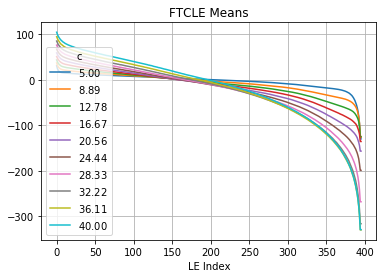

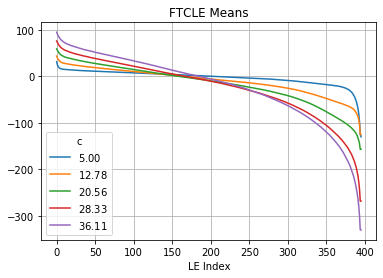

In [14]:
spectra_parameter(c_experiment, 'c', geometry='C')
spectra_parameter(c_experiment[::2], 'c', geometry='C')

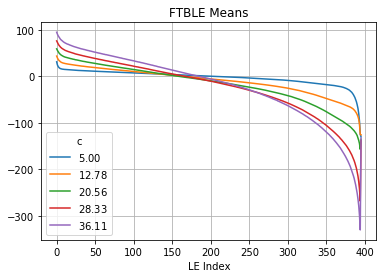

In [7]:
spectra_parameter(c_experiment[::2], 'c', geometry='B')

## Determing $k_d$

In [9]:
for experiment in [c_experiment]:
    for data in tqdm(experiment):
        CLE = spectra(data)
        kd = min_pos(CLE)
        data.attrs.update({'k_d': kd})

When c=5.00, kd = 206
When c=8.89, kd = 176
When c=12.78, kd = 165
When c=16.67, kd = 159
When c=20.56, kd = 159
When c=24.44, kd = 162
When c=28.33, kd = 168
When c=32.22, kd = 175
When c=36.11, kd = 185
When c=40.00, kd = 197


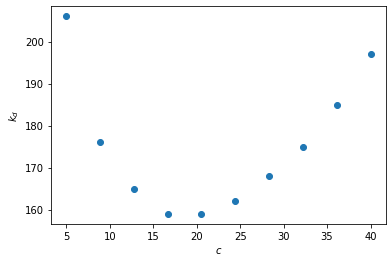

In [13]:
plt.scatter([data.c for data in experiment], [data.k_d for data in experiment])
plt.xlabel('$c$')
plt.ylabel('$k_d$')

for data in experiment: 
    print(f'When c={data.c:.2f}, kd = {data.k_d}')

## Correlations between FTLEs

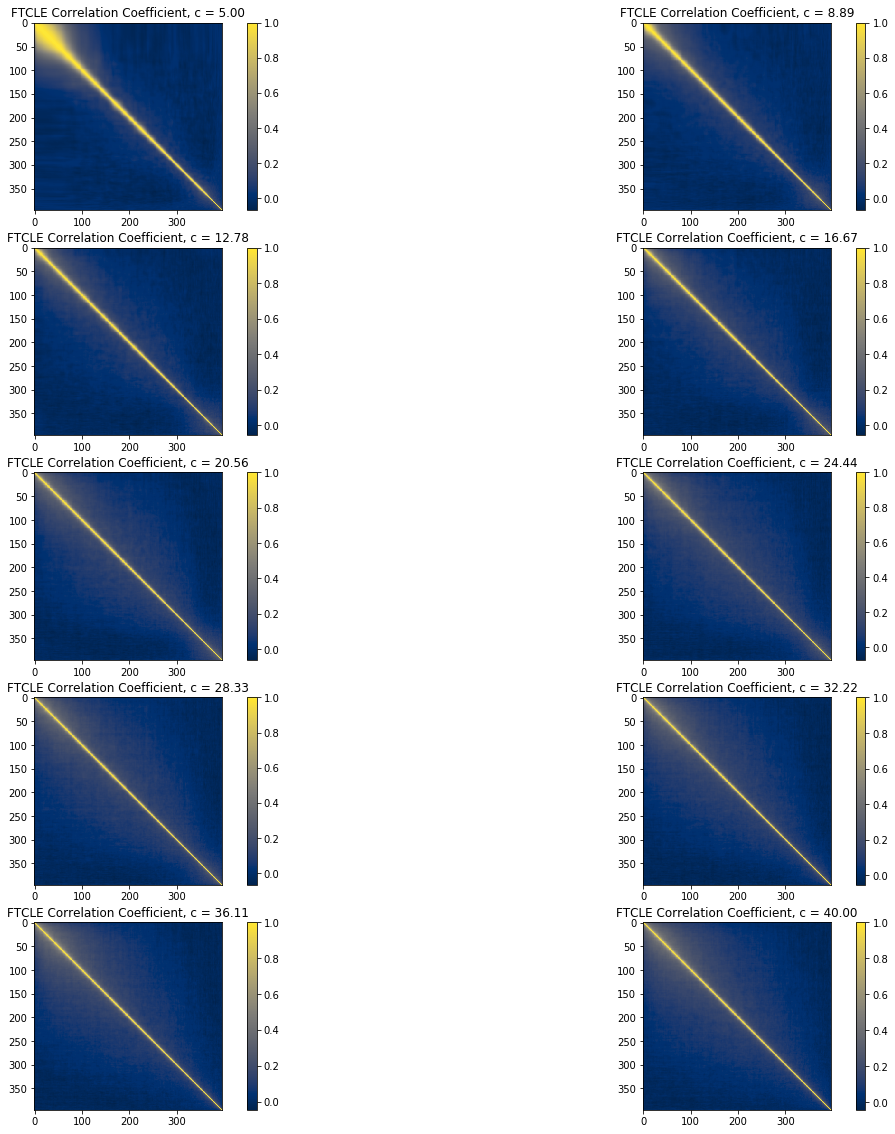

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))


for data, ax in zip(c_experiment, fig.axes):
    correlations = np.corrcoef(data.ftcle, rowvar=False)
    # Plot the heatmap
    im = ax.imshow(correlations, cmap = 'cividis')
    ax.set_title(f'FTCLE Correlation Coefficient, c = {data.c:.2f}')

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
#fig.savefig('FTCLE-Correlation-c.png', dpi=1200)
fig.show()

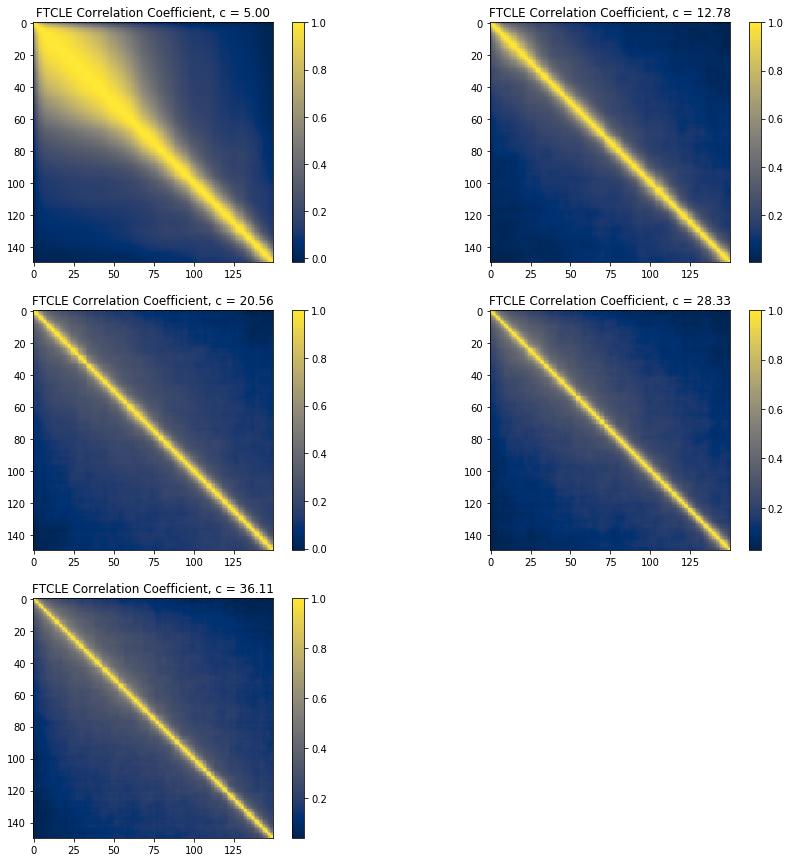

In [18]:
# Zoomed in plot
max_index = 150

fig, axes = plt.subplots(3, 2, figsize=(15, 15))


for data, ax in zip(c_experiment[::2], fig.axes):
    ftle = data.ftcle.sel(le_index = np.arange(1, max_index + 1))
    correlations = np.corrcoef(ftle, rowvar=False)
    # Plot the heatmap
    im = ax.imshow(correlations, cmap = 'cividis')
    ax.set_title(f'FTCLE Correlation Coefficient, c = {data.c:.2f}')

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
fig.delaxes(axes.flatten()[-1])
#fig.savefig('FTCLE-Correlation-Zoom.png', dpi=1200)
fig.show()